## `Single Convolutional using vgg model`

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from keras.models import Model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import VGG16  # it is a model

from numpy import expand_dims
from keras.applications.vgg16 import preprocess_input

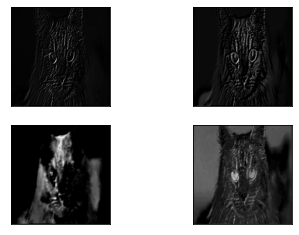

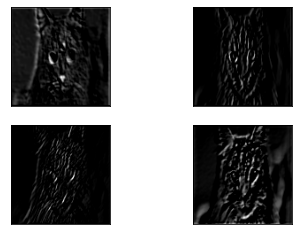

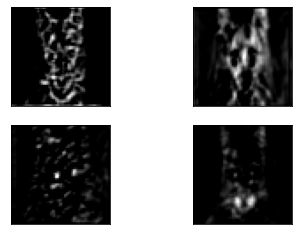

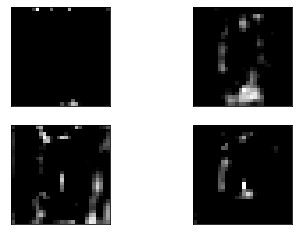

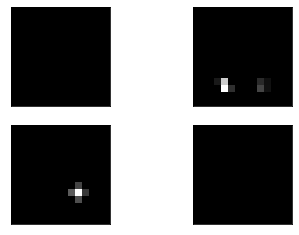

In [ ]:
model = VGG16()
hdlyrs = [2,5,9,13,17]
outputs = [model.layers[i].output for i in hdlyrs]
model = Model(inputs=model.inputs,outputs=outputs)
img = load_img('/content/drive/MyDrive/Deep Learning/cat.jpg',target_size=(224,224))
img = img_to_array(img)
img = expand_dims(img,axis=0)
img = preprocess_input(img)
feature_map = model.predict(img)
square = 2
for fmap in feature_map:
  ix = 1
  for _ in range(square):
    for i in range(square):
      ax = plt.subplot(square,square,ix)
      ax.set_xticks([])
      ax.set_yticks([])
      plt.imshow(fmap[0,:,:,ix-1],cmap='gray')
      ix += 1
  plt.show()

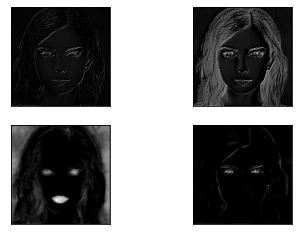

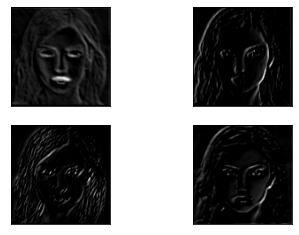

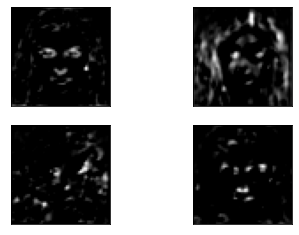

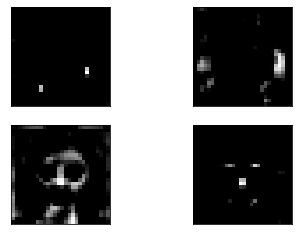

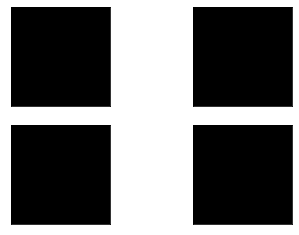

In [ ]:
model = VGG16()
hdlyrs = [2,5,9,13,17]
outputs = [model.layers[i].output for i in hdlyrs]
model = Model(inputs=model.inputs,outputs=outputs)
img = load_img('/content/drive/MyDrive/Deep Learning/lady.jpg',target_size=(224,224))
img = img_to_array(img)
img = expand_dims(img,axis=0)
img = preprocess_input(img)
feature_map = model.predict(img)
square = 2
for fmap in feature_map:
  ix = 1
  for _ in range(square):
    for i in range(square):
      ax = plt.subplot(square,square,ix)
      ax.set_xticks([])
      ax.set_yticks([])
      plt.imshow(fmap[0,:,:,ix-1],cmap='gray')
      ix += 1
  plt.show()

## `Implement model from scratch`
## `CNN from scratch`

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [ ]:
(X_train , y_train) , (X_test , y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

Te Label of the image : 8
(28, 28)


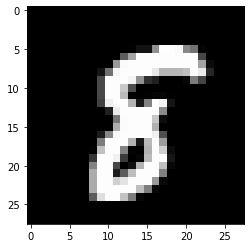

In [ ]:
print('Te Label of the image :',y_train[2001])
print(X_train[2001].shape)
plt.imshow(X_train[2001],cmap='gray')

In [ ]:
X_train[2001]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          2,  18,  18, 145, 255, 254, 249, 136, 115,   5,   0,   0,   0,
          0,   0],
       [  

In [ ]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_test.shape

(10000, 28, 28, 1)

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
X_train /= 255  # normalize
X_test /= 255

In [ ]:
print(X_train.max(),X_train.min())

1.0 0.0


In [ ]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)

In [ ]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
y_train[2001]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

### `CNN Model from scratch`

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 128)               2359424   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,370,282
Trainable params: 2,370,282
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
model.fit(X_train,y_train,batch_size=32,epochs=10,validation_split=0.3)

Epoch 1/10
1313/1313 [==============================] - 163s 123ms/step - loss: 0.1308 - accuracy: 0.9597 - val_loss: 0.0645 - val_accuracy: 0.9806
Epoch 2/10
1313/1313 [==============================] - 111s 84ms/step - loss: 0.0393 - accuracy: 0.9877 - val_loss: 0.0618 - val_accuracy: 0.9828
Epoch 3/10
1313/1313 [==============================] - 106s 81ms/step - loss: 0.0217 - accuracy: 0.9930 - val_loss: 0.0595 - val_accuracy: 0.9847
Epoch 4/10
1313/1313 [==============================] - 106s 81ms/step - loss: 0.0151 - accuracy: 0.9950 - val_loss: 0.0728 - val_accuracy: 0.9826
Epoch 5/10
1313/1313 [==============================] - 106s 81ms/step - loss: 0.0108 - accuracy: 0.9963 - val_loss: 0.0686 - val_accuracy: 0.9840
Epoch 6/10
1313/1313 [==============================] - 106s 80ms/step - loss: 0.0083 - accuracy: 0.9974 - val_loss: 0.0577 - val_accuracy: 0.9869
Epoch 7/10
1313/1313 [==============================] - 105s 80ms/step - loss: 0.0063 - accuracy: 0.9979 - val_loss: 

# **END**